In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
dd=pd.read_csv(r"C:\Users\abhij\Desktop\Semester 3\Z\AC_Data (1).csv")

In [4]:
df=dd.copy()

In [5]:
d=dd.copy()

# Q. Which AC was used the most/least?

This can be calculated by simply counting the number of columns which have the most filled value in it.

In [6]:
d.fillna(0,inplace=True)
d.drop(columns='0',inplace=True)

In [7]:
d[d > 0].count()

AC 1     29713
AC 2     37554
AC 3     38911
AC 4     34131
AC 5     39517
AC 6     34689
AC 7     39741
AC 8     37083
AC 9     40880
AC 10    41440
AC 11    36709
AC 12    38832
AC 13    41418
AC 14    41950
AC 15    39709
AC 16    39209
AC 17    42735
AC 18    42323
dtype: int64

C:\ESD\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Minutes used/2')

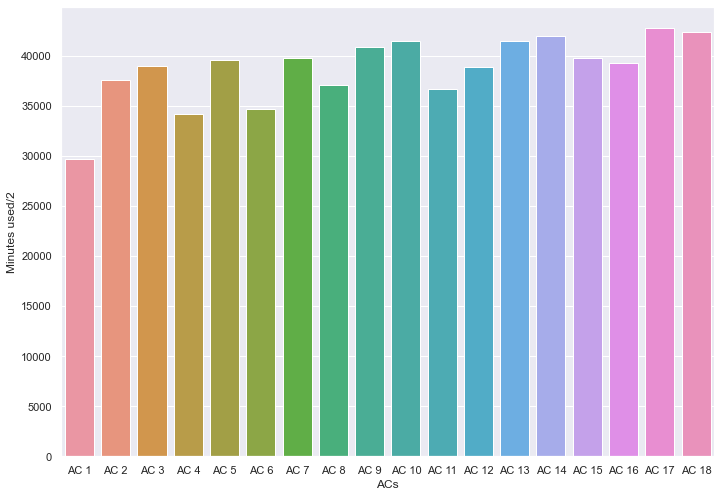

In [8]:
# d[d > 0].count().plot.bar()
sns.barplot(d[d > 0].count().index, d[d > 0].count().values)
plt.xlabel("ACs")
plt.ylabel("Minutes used/2")

# From the analysis, it is concluded that the most used AC is AC 17.

# Q. Relate this power data with the outside temperature of Gurgaon.

# DATA PRE-PROCESSING

In [9]:
df.isnull().sum()

0            0
AC 1     44132
AC 2     44129
AC 3     44127
AC 4     44136
AC 5     44124
AC 6     44123
AC 7     44161
AC 8     44136
AC 9     44186
AC 10    44150
AC 11    44170
AC 12    44127
AC 13    44121
AC 14    44144
AC 15    44125
AC 16    44130
AC 17    44126
AC 18    44117
dtype: int64

50% of the loaded data is null

In [10]:
df.shape

(87840, 19)

Considering the system has recorded Nan when Ac was not functioning thus Filling the NaN value with 0 

In [11]:
df.fillna(0,inplace=True)

Converting object to datetime format

In [12]:
df['0'] = pd.to_datetime(df['0'])

Converting datetime column as index for further analysis

In [13]:
df.set_index('0',inplace=True)

Creating columns for calculating a hourly average temperature for the two month of data.

In [14]:
df['year']=df.index.year
df['month']=df.index.month
df['day']=df.index.day
df['hour']=df.index.hour
df['Date']=pd.to_datetime(df[['year','month','day','hour']])

In [15]:
dfnew=df.groupby('Date', as_index=False)['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9','AC 10', 'AC 11', 
                                         'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16', 'AC 17', 'AC 18'].sum()

<ipython-input-15-a8bb17c62642>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfnew=df.groupby('Date', as_index=False)['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9','AC 10', 'AC 11',


In [16]:
dfnew.set_index('Date',inplace=True)

Hourly data of Gurgaon was downloaded from url: https://power.larc.nasa.gov/data-access-viewer/. Data had columns containing year, month, day, hour and temperature. 

In [17]:
temp=pd.read_csv(r"C:\Users\abhij\Desktop\Semester 3\Z\POWER_Point_Hourly_20190801_20191001_028d4891N_077d0515E_LST.csv",skiprows=9)

Renaming colmn name and converting column into timestamp

In [18]:
temp=temp.rename(columns={'YEAR':'year', 'MO':'month', 'DY':'day', 'HR':'hour'})

In [19]:
temp['Date']=pd.to_datetime(temp[['year','month','day','hour']])

In [20]:
temp.columns

Index(['year', 'month', 'day', 'hour', 'T2M', 'Date'], dtype='object')

In [21]:
temp.drop(columns=['year', 'month', 'day', 'hour'],inplace=True)

In [22]:
temp.set_index('Date',inplace=True)

Concatenating both the temprature and Ac power datasets

In [23]:
data=pd.concat([dfnew, temp], axis=1, join="inner")

In [24]:
data.shape

(1464, 19)

# T2M coloumn has the mean temperature for the hour and ACs column have energy consumption.

# Q. METHOD 1 Using the power data, predict/forecast the power consumption?¶

In [26]:
b=int(input("AC number:"))
lis={1:'AC 1', 2:'AC 2', 3:'AC 3', 4:'AC 4', 5:'AC 5', 6:'AC 6', 7:'AC 7', 8:'AC 8', 9:'AC 9',
       10:'AC 10', 11:'AC 11', 12:'AC 12', 13:'AC 13', 14:'AC 14',15: 'AC 15', 16:'AC 16', 17:'AC 17',
       18:'AC 18'}

In [27]:
dp=dd.copy()

In [28]:
dp.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [29]:
dp.isnull().sum()

0            0
AC 1     44132
AC 2     44129
AC 3     44127
AC 4     44136
AC 5     44124
AC 6     44123
AC 7     44161
AC 8     44136
AC 9     44186
AC 10    44150
AC 11    44170
AC 12    44127
AC 13    44121
AC 14    44144
AC 15    44125
AC 16    44130
AC 17    44126
AC 18    44117
dtype: int64

50% of the loaded data is null

Data is recorded in every alternate row. This means that the data is available for every 2 minute period. Thus dropping row if all the AC columns are reporting NaN.

In [30]:
dp.dropna(subset=['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8',
       'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16',
       'AC 17', 'AC 18'], how='all',inplace=True)

In [31]:
dp.shape

(51979, 19)

Thus the data observation have reduced from 87840 to 51979.


In [32]:
dp.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
6,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
8,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474


In [33]:
dp['0'] = pd.to_datetime(dp['0'], errors='coerce')

Time series feature

In [34]:
dp['dow']=dp['0'].dt.dayofweek 
dp['doy'] = dp['0'].dt.dayofyear
dp['year'] = dp['0'].dt.year
dp['month'] = dp['0'].dt.month
dp['quarter'] = dp['0'].dt.quarter
dp['hour'] = dp['0'].dt.hour
dp['woy'] = dp['0'].dt.weekofyear
dp['dom'] = dp['0'].dt.day # Day of Month
dp['date'] = dp['0'].dt.date 
dp['minutes'] = dp['0'].dt.minute

<ipython-input-34-70a6b739b8a7>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dp['woy'] = dp['0'].dt.weekofyear


<AxesSubplot:xlabel='hour', ylabel='AC 2'>

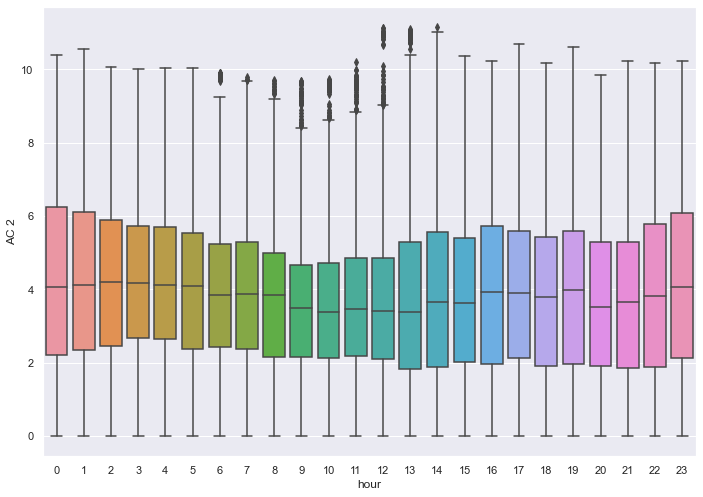

In [35]:
sns.boxplot(x=dp['hour'],y=dp[lis[b]])

From the boxplot we can infer that the consumption dips in the afternoon and is lowest in 12:00 which can be due to the change over time of the hotel or can be due the working residence.

<AxesSubplot:xlabel='date', ylabel='AC 2'>

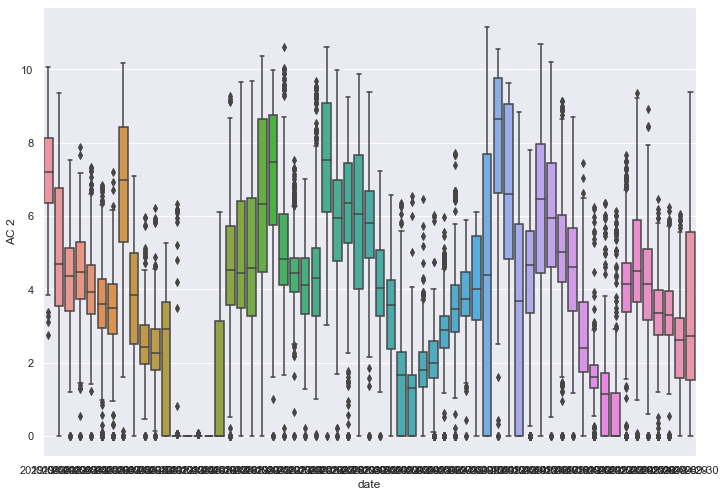

In [36]:
sns.boxplot(x=dp['date'],y=dp[lis[b]])

In [37]:
dp.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,...,dow,doy,year,month,quarter,hour,woy,dom,date,minutes
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,...,3,213,2019,8,3,0,31,1,2019-08-01,0
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,...,3,213,2019,8,3,0,31,1,2019-08-01,2
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,...,3,213,2019,8,3,0,31,1,2019-08-01,4
6,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,...,3,213,2019,8,3,0,31,1,2019-08-01,6
8,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,...,3,213,2019,8,3,0,31,1,2019-08-01,8


In [38]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
tempa = dd.copy() # make temporary copy of dataframe
# dataset = tempa['total load actual'].dropna().values # numpy.ndarray of the actual load
dataset =dp[lis[b]].dropna().values
dataset = dataset.astype('float32') 
dataset = np.reshape(dataset, (-1, 1)) # reshape to one feature; required for the models

scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
dataset = scaler.fit_transform(dataset) # fit and transform the dataset

# Train and Test splits
train_size = int(len(dataset) * 0.80) 
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 25 # timesteps to lookback for predictions
X_train, trainY = create_dataset(train, look_back)
X_test, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print("Shapes: \nTraining set: {}, Testing set: {}".format(X_train.shape, X_test.shape))
print("Sample from training set: \n{}".format(X_train[0]))

Shapes: 
Training set: (34942, 1, 25), Testing set: (8717, 1, 25)
Sample from training set: 
[[0.78839195 0.8020546  0.82183427 0.8132692  0.8160056  0.8107203
  0.81141156 0.8154903  0.8172436  0.7319207  0.7143299  0.7639572
  0.77476776 0.7644021  0.7612914  0.79969805 0.7715573  0.7129581
  0.6534385  0.7291006  0.7966978  0.5578928  0.6212635  0.6880666
  0.7465449 ]]


Models and their MAPE
Here we test various models and visualize their predictions. Models used are:

AutoRegressive

An autoregressive (AR) model predicts future behavior based on past behavior. The process is basically a linear regression of the data in the current series against one or more past values in the same series.

In [39]:
from statsmodels.tsa.ar_model import AR

model = AR(train)
model_fit = model.fit()

C:\ESD\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [41]:
from sklearn.metrics import mean_absolute_error
test_predict = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# invert predictions
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_test = scaler.inverse_transform(test)
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict))
# print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict)))

Test Mean Absolute Error: 1.8418994379888112


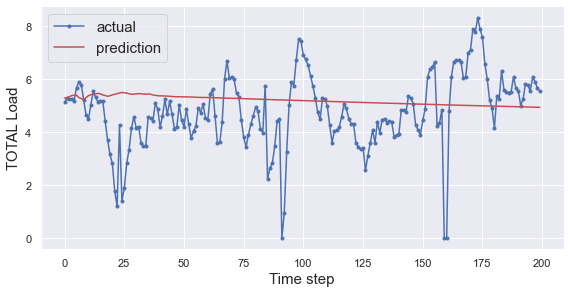

In [44]:
idx = 200
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('TOTAL Load', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

# METHOD 2: Using the power data, predict/forecast the power consumption?

In this method i have build a regression model for the user input ACs predicting consumption for a given temperature.

In [ ]:
a=int(input("AC number:"))

In [ ]:
pre=data.copy()

In [ ]:
sns.scatterplot(pre[li[a]], pre['T2M'])

In [ ]:
li={1:'AC 1', 2:'AC 2', 3:'AC 3', 4:'AC 4', 5:'AC 5', 6:'AC 6', 7:'AC 7', 8:'AC 8', 9:'AC 9',
       10:'AC 10', 11:'AC 11', 12:'AC 12', 13:'AC 13', 14:'AC 14',15: 'AC 15', 16:'AC 16', 17:'AC 17',
       18:'AC 18'}

In [ ]:
x=pre[li[a]].reset_index(drop=True).values

In [ ]:
y=pre['T2M']

In [ ]:
x=x.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

Here I have used the regression algorithm to predict the consumption of the specific AC selected for a given atmostpheric temperature

# Identify patterns/trends in the data?

In [45]:
c=int(input("AC number:"))
liste={1:'AC 1', 2:'AC 2', 3:'AC 3', 4:'AC 4', 5:'AC 5', 6:'AC 6', 7:'AC 7', 8:'AC 8', 9:'AC 9',
       10:'AC 10', 11:'AC 11', 12:'AC 12', 13:'AC 13', 14:'AC 14',15: 'AC 15', 16:'AC 16', 17:'AC 17',
       18:'AC 18'}
# Draw Plot
l=['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9',
       'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16', 'AC 17',
       'AC 18']
def plot_df(d, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


AC number:5


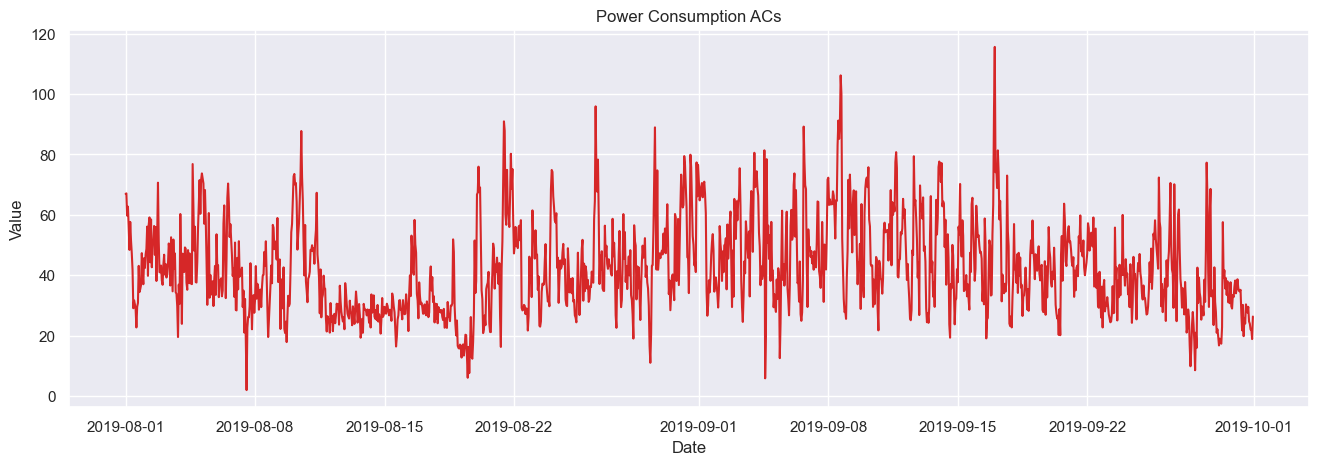

In [49]:
plot_df(data, x=data.index, y=data[liste[c]], title='Power Consumption ACs') 

In [50]:
data.describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,T2M
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,71.036491,115.514445,76.689178,71.501370,42.452874,75.194967,88.935799,76.085284,94.952885,45.908626,71.773354,80.607446,127.809174,87.067324,120.821899,83.599860,125.975726,193.010635,29.971066
std,62.222384,69.713686,36.942748,46.763036,15.300589,38.044783,32.541262,33.466595,33.965109,14.466557,37.049094,31.842020,44.399738,37.232070,51.766950,38.293750,28.889456,62.417622,3.489920
min,0.000000,0.000000,0.000000,0.000000,1.983627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.211827,0.000000,0.000000,22.510000
25%,26.394744,64.451285,52.587095,39.142842,30.658488,49.793138,67.007483,53.654264,72.123669,35.665261,47.528061,59.163844,97.922275,60.262960,91.871769,55.590501,111.004076,136.207017,27.220000
50%,57.587046,113.889505,73.138123,65.925950,40.181725,76.885473,87.735276,75.210547,89.916422,44.741303,67.200975,78.877440,125.034052,81.672274,115.555089,76.120030,135.266577,207.751500,29.480000
75%,103.248487,155.684323,97.765439,99.578369,51.502409,102.147447,109.664215,97.701289,114.282802,55.002025,90.447895,100.322193,152.834627,110.569425,151.785386,105.301845,146.464405,243.016873,32.650000
max,294.294902,326.477464,240.479633,253.028241,115.607525,190.278883,227.694758,215.165564,250.060543,102.637559,285.384093,241.821750,277.649412,253.988777,288.449451,288.407798,168.391257,297.038352,38.690000


Mean Consumption per hour of ACs

In [51]:
data.describe().iloc[1,:]

AC 1      71.036491
AC 2     115.514445
AC 3      76.689178
AC 4      71.501370
AC 5      42.452874
AC 6      75.194967
AC 7      88.935799
AC 8      76.085284
AC 9      94.952885
AC 10     45.908626
AC 11     71.773354
AC 12     80.607446
AC 13    127.809174
AC 14     87.067324
AC 15    120.821899
AC 16     83.599860
AC 17    125.975726
AC 18    193.010635
T2M       29.971066
Name: mean, dtype: float64

Hours Used

In [52]:
d[d > 0].count()

AC 1     29713
AC 2     37554
AC 3     38911
AC 4     34131
AC 5     39517
AC 6     34689
AC 7     39741
AC 8     37083
AC 9     40880
AC 10    41440
AC 11    36709
AC 12    38832
AC 13    41418
AC 14    41950
AC 15    39709
AC 16    39209
AC 17    42735
AC 18    42323
dtype: int64

In [53]:
pattern=pd.concat([data.describe().iloc[1,:],d[d > 0].count()], axis=1, join="inner")

In [64]:
pattern.rename(columns={'mean':'Mean Consumption per hour of ACs',0:'Hours Used'},inplace=True)

In [68]:
pattern['AC']=pattern.index

<AxesSubplot:xlabel='AC'>

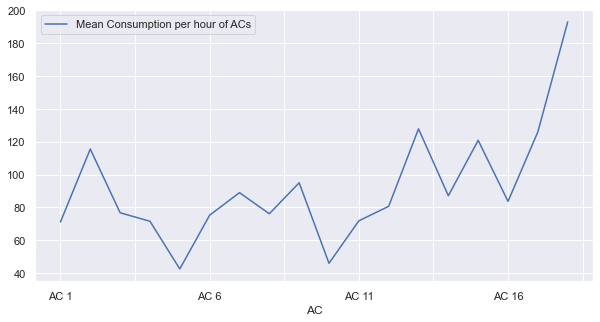

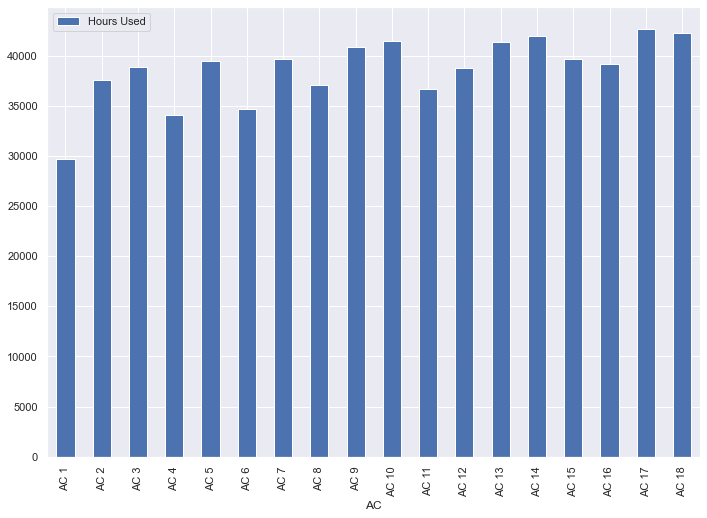

In [72]:
pattern.plot(x='AC', y=['Mean Consumption per hour of ACs' ], figsize=(10,5), grid=True)
pattern.plot(x='AC', y=[ 'Hours Used'], kind="bar")